In [60]:
# import the necessary packages
from __future__ import print_function
import sys
sys.path.insert(0, "library/")

import detectAndDescribe as DetectAndDescribe
import burgerMatcher as BurgerMatcher
import argparse
import glob
import csv
import cv2

In [61]:
# initalize the database dictionary of covers
db = {}

In [62]:
# loop over the database
for l in csv.reader(open('burgers.csv')):
    # update the database using the image ID as the key
    db[l[0]] = l[1:]
    print(l[1:])

['BTS Burger', 'BTS']
['Tejas Burger', 'Tejas']


In [63]:
# initialize the burger descriptor and burger matcher
dad = DetectAndDescribe.DetectAndDescribe(cv2.FeatureDetector_create("SIFT"), cv2.DescriptorExtractor_create("SIFT"))
print(dad)

<detectAndDescribe.DetectAndDescribe instance at 0x109598d88>


In [64]:
cv = BurgerMatcher.BurgerMatcher(dad, glob.glob('burger' + "/*.jpg"))
print(cv)

<burgerMatcher.BurgerMatcher instance at 0x10a4d6170>


In [65]:
# load the query image, covert it to grayscale, and extract
# keypoints and descriptors
queryImage = cv2.imread('queries/burger001.jpg')
gray = cv2.cvtColor(queryImage, cv2.COLOR_BGR2GRAY)
(queryKps, queryDescs) = dad.describe(gray)
print((queryKps, queryDescs))

(array([[370,  84],
       [447, 120],
       [447, 120],
       ..., 
       [550, 447],
       [374, 208],
       [231, 480]]), array([[  5.,  39.,  59., ...,   0.,   0.,  28.],
       [  8.,   0.,   2., ...,   0.,   0.,   0.],
       [ 61.,  45.,   1., ...,  13.,   0.,   0.],
       ..., 
       [  6.,  10.,   9., ...,  18.,   9.,   4.],
       [  1.,  12.,  30., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   3.,   0.,   0.]], dtype=float32))


In [69]:
# try to match the burger to a known database of iamges
#results = cv.search(queryKps, queryDescs)
#print(results)
cv.search(queryKps, queryDescs)

{}

In [57]:
# show the query burger
import matplotlib.pyplot as plt
%matplotlib inline

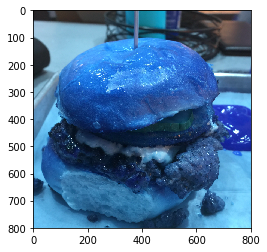

In [58]:
plt.imshow(queryImage)

In [59]:
# check to see if no results were found 
if len(results) == 0:
    print("I could not find a match for that burger!")

I could not find a match for that burger!
